In [1]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
DATA_DIR = '../data/clean/'

In [3]:
files <- list.files(DATA_DIR)
files[1:5]
length(files)

[1] "alpineMeadowsWA.csv_2007.csv" "alpineMeadowsWA.csv_2008.csv"
[3] "alpineMeadowsWA.csv_2009.csv" "alpineMeadowsWA.csv_2010.csv"
[5] "alpineMeadowsWA.csv_2011.csv"

[1] 250

In [4]:
daily <- read.csv(paste(DATA_DIR, files[120], sep=''))
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-01,0.0,-18.2,-6.1,-26.9,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-02,2.5,-11.1,0.1,-21.0,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-03,2.5,-7.1,2.9,-15.1,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-04,2.5,-5.1,-0.1,-9.8,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-05,2.5,-6.0,-3.9,-7.6,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-06,2.5,-5.7,-2.1,-7.2,2016


In [5]:
daily$DATE <- as.Date(daily$DATE, format='%Y-%m-%d')
daily <- daily[complete.cases(daily), ]
daily <- daily[order(daily$DATE), ]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-01,0.0,-18.2,-6.1,-26.9,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-02,2.5,-11.1,0.1,-21.0,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-03,2.5,-7.1,2.9,-15.1,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-04,2.5,-5.1,-0.1,-9.8,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-05,2.5,-6.0,-3.9,-7.6,2016
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-06,2.5,-5.7,-2.1,-7.2,2016


In [6]:
daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
daily$YDAY <- yday(daily$DATE)
#daily$YEAR_MONTH <- paste(daily$YEAR, daily$MONTH, sep='_')
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-01,0.0,-18.2,-6.1,-26.9,2016,1,1
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-02,2.5,-11.1,0.1,-21.0,2016,1,2
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-03,2.5,-7.1,2.9,-15.1,2016,1,3
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-04,2.5,-5.1,-0.1,-9.8,2016,1,4
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-05,2.5,-6.0,-3.9,-7.6,2016,1,5
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-06,2.5,-5.7,-2.1,-7.2,2016,1,6


In [7]:
monthly.means <- tapply(daily$TAVG, daily$MONTH, mean)
daily$monthly.means <- monthly.means[daily$MONTH]
monthly.precip <- tapply(daily$PRCP, daily$MONTH, sum)
daily$monthly.precip <- monthly.precip[daily$MONTH]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY,monthly.means,monthly.precip
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-01,0.0,-18.2,-6.1,-26.9,2016,1,1,-8.16129,47.8
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-02,2.5,-11.1,0.1,-21.0,2016,1,2,-8.16129,47.8
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-03,2.5,-7.1,2.9,-15.1,2016,1,3,-8.16129,47.8
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-04,2.5,-5.1,-0.1,-9.8,2016,1,4,-8.16129,47.8
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-05,2.5,-6.0,-3.9,-7.6,2016,1,5,-8.16129,47.8
USS0010J10S,"LAKEFORK NUMBER 1, UT US",40.6,-110.43,3174.5,2016-01-06,2.5,-5.7,-2.1,-7.2,2016,1,6,-8.16129,47.8


In [8]:
#daily$prev.monthly.means <- c(
#    rep(NA, 2*365), daily$monthly.means[1:(dim(daily)[1] - 2*365)])

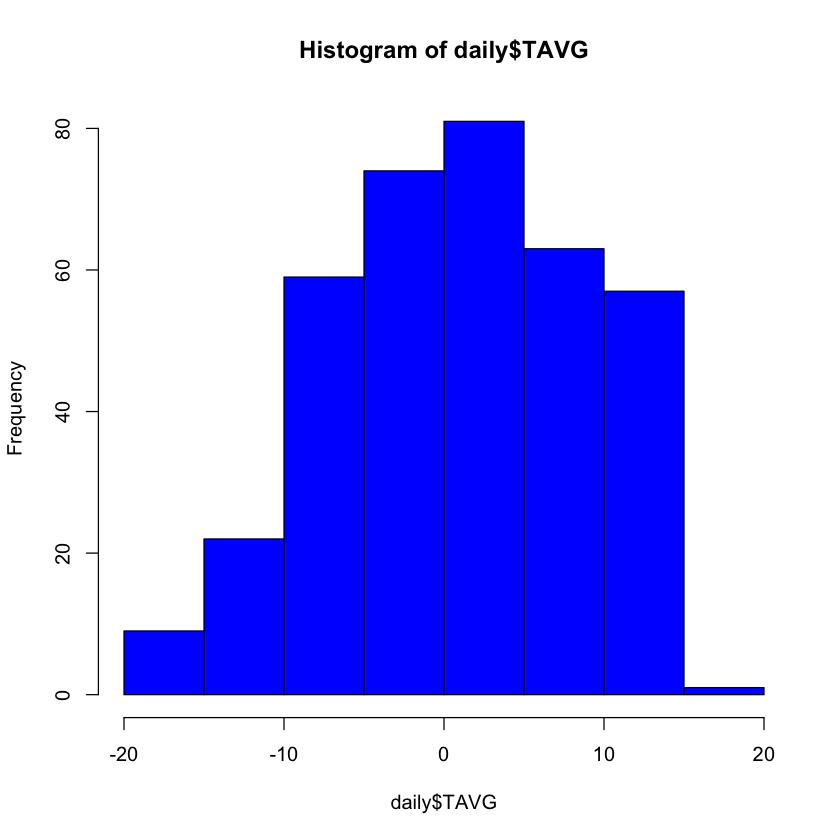

In [9]:
hist(daily$TAVG, col=4)

In [10]:
DAYS <- 365.25
mod1 <- lm(TAVG ~ monthly.means 
             + YDAY
             + monthly.precip
             + monthly.precip:monthly.means
             + monthly.precip:YDAY
             + monthly.precip:I(YDAY^2)
             + I(YDAY^2)
             + YDAY:monthly.means
             + I(YDAY^2):monthly.means
             + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2)), 
           data=daily)
mod1 <- step(mod1, trace=0)
summary(mod1)


Call:
lm(formula = TAVG ~ monthly.means + YDAY + monthly.precip + I(YDAY^2) + 
    monthly.means:monthly.precip + YDAY:monthly.precip + monthly.precip:I(YDAY^2) + 
    monthly.means:YDAY + monthly.means:I(YDAY^2), data = daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9726  -1.6967   0.1493   2.4440   9.4438 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1.897e+01  4.405e+00  -4.307 2.14e-05 ***
monthly.means                -9.445e-01  4.835e-01  -1.954  0.05152 .  
YDAY                          3.051e-01  6.782e-02   4.498 9.29e-06 ***
monthly.precip                1.115e-01  5.974e-02   1.867  0.06278 .  
I(YDAY^2)                    -7.977e-04  1.767e-04  -4.514 8.67e-06 ***
monthly.means:monthly.precip  1.035e-02  3.149e-03   3.285  0.00112 ** 
YDAY:monthly.precip          -2.340e-03  8.439e-04  -2.773  0.00584 ** 
monthly.precip:I(YDAY^2)      6.375e-06  2.157e-06   2.955  0.00333 ** 
mont

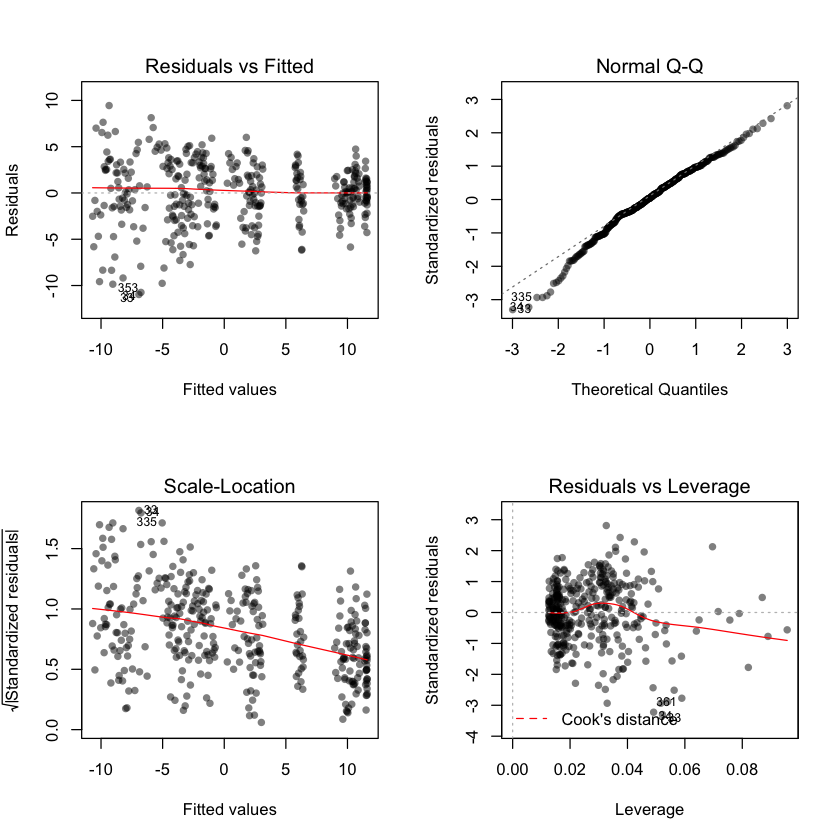

In [11]:
par(mfrow=c(2, 2))
plot(mod1, pch=16, col=rgb(0, 0, 0, 0.5))

In [12]:
preds <- predict(mod1)

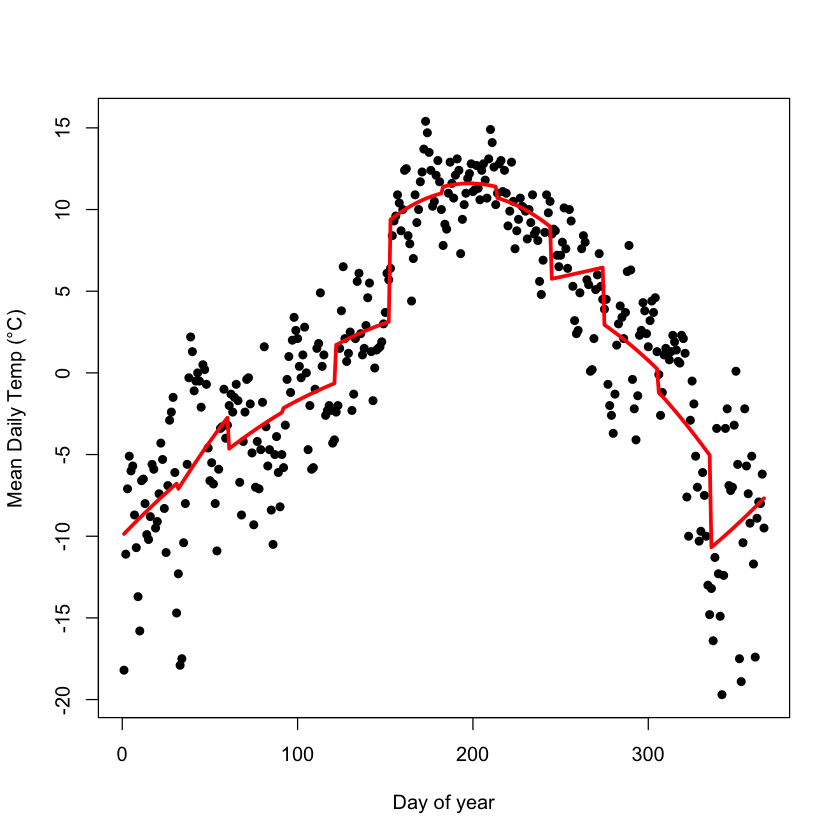

In [13]:
plot(daily$TAVG, pch=16, xlab='Day of year', ylab='Mean Daily Temp (°C)')
lines(preds, col=2, lwd=3)
legend(-5, 21, pch=16, legend='      observed data', bty='n')
legend(-5, 19, lty=1, lwd=3, col=2, legend='predicted values', bty='n')

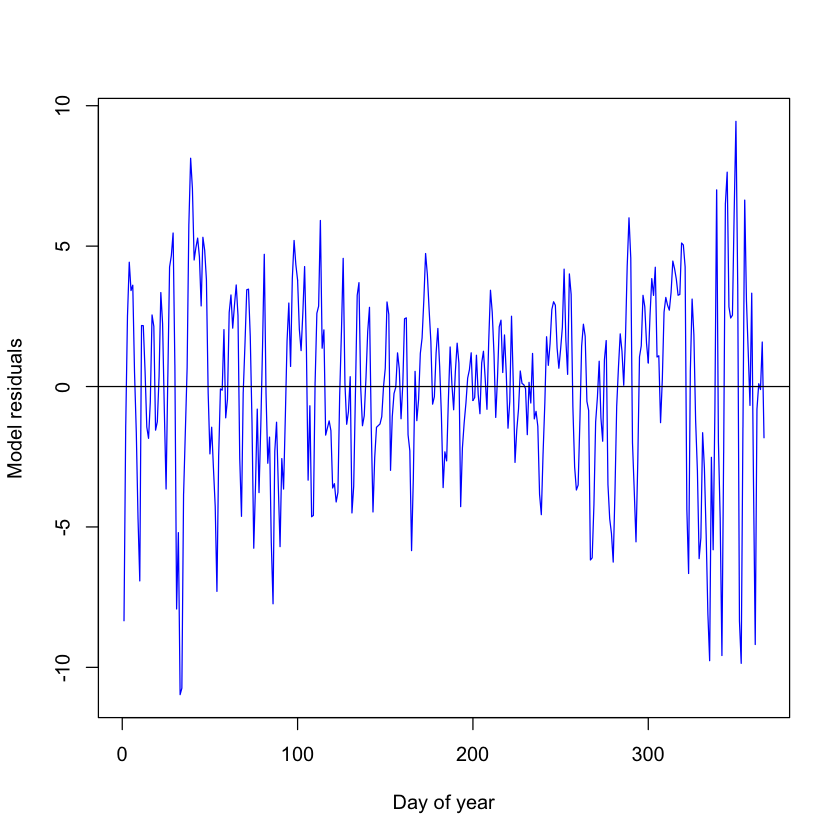

In [14]:
plot(mod1$resid ~ daily$YDAY, 
     type='l', 
     col=4, 
     xlab='Day of year', 
     ylab='Model residuals')
abline(h=0)

Best AR(p): p = 2

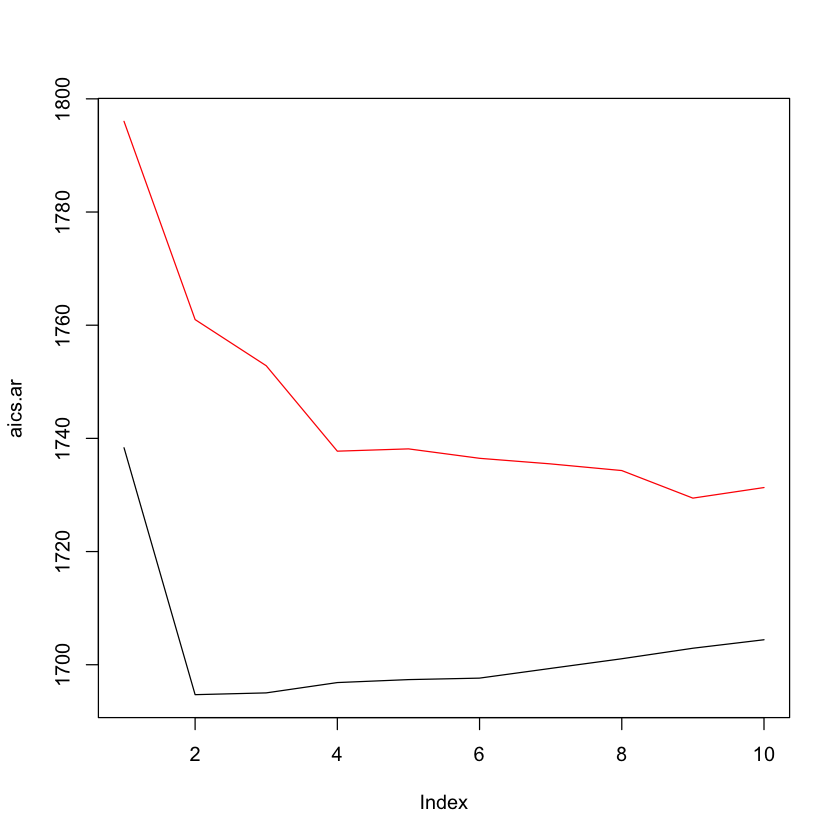

In [15]:
aics.ar <- numeric(10)
aics.ari <- numeric(10)
for (ar in 1:10) {
  ar.mod <- arima(resid(mod1), order=c(ar, 0, 0))
  ari.mod <- arima(resid(mod1), order=c(ar, 1, 0))
  aics.ar[ar] <- ar.mod$aic
  aics.ari[ar] <- ari.mod$aic
}

cat('Best AR(p): p =', which(aics.ar == min(aics.ar)))
plot(aics.ar, type='l', ylim=range(c(aics.ar, aics.ari)))
lines(aics.ari, col=2)

In [16]:
ar2.mod <- arima(resid(mod1), order=c(2, 0, 0))
ar2.mod


Call:
arima(x = resid(mod1), order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.8726  -0.3461    -0.0313
s.e.  0.0496   0.0496     0.2670

sigma^2 estimated as 5.862:  log likelihood = -843.36,  aic = 1694.71

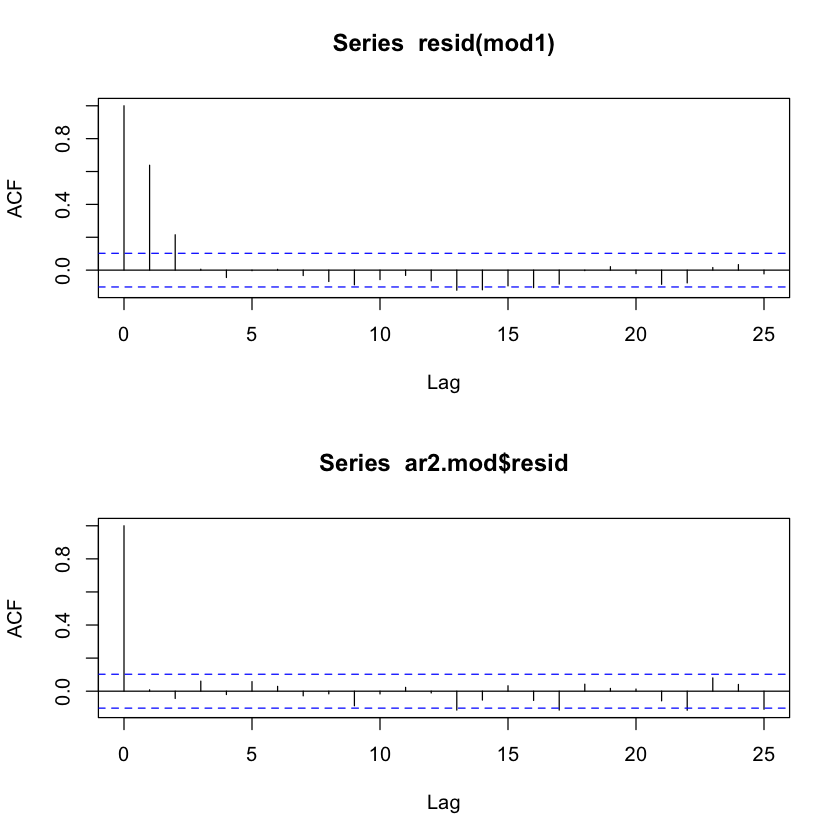

In [17]:
par(mfrow=c(2, 1))
acf(resid(mod1))
acf(ar2.mod$resid)

In [18]:
arima.error <- ar2.mod$resid
mean(arima.error) # should be ~ 0

[1] 0.01141668

In [19]:
sd(arima.error)

[1] 2.424379

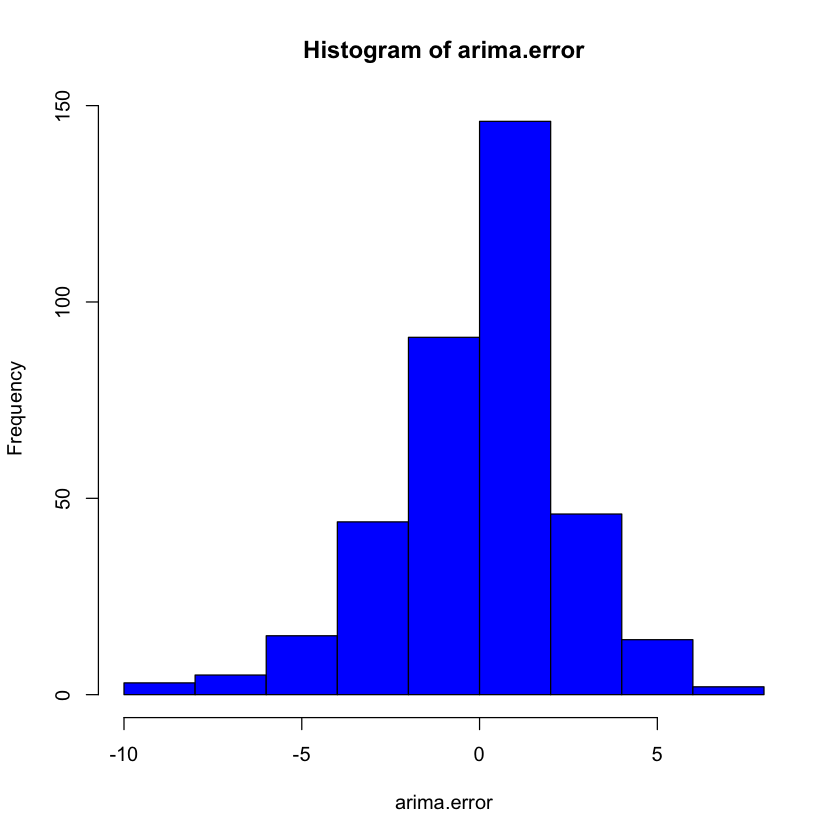

In [20]:
hist(arima.error, col=4)

In [21]:
n <- length(arima.error)
last3 <- arima.error[(n-2):n]
betas <- ar2.mod$coef
betas

ar1         ar2   intercept 
 0.87256755 -0.34608685 -0.03129543

In [22]:
pseudo.arima.error <- rnorm(n + 3, mean(arima.error), sd(arima.error))
pseudo.resids <- numeric(n + 3)
# use end of year to seed beginning
pseudo.resids[1:3] <- arima.error[(n-2):n] 
for (t in 4:(n + 3)) {
  pseudo.resids[t] <- (betas['intercept'] 
                       + betas['ar1']*pseudo.resids[t - 1]
                       + betas['ar2']*pseudo.resids[t - 2]
                       #+ betas['ar3']*pseudo.resids[t - 3]
                       + pseudo.arima.error[t])
}

pseudo.resids <- pseudo.resids[-c(1:3)]
length(preds)
length(pseudo.resids)

[1] 366

[1] 366

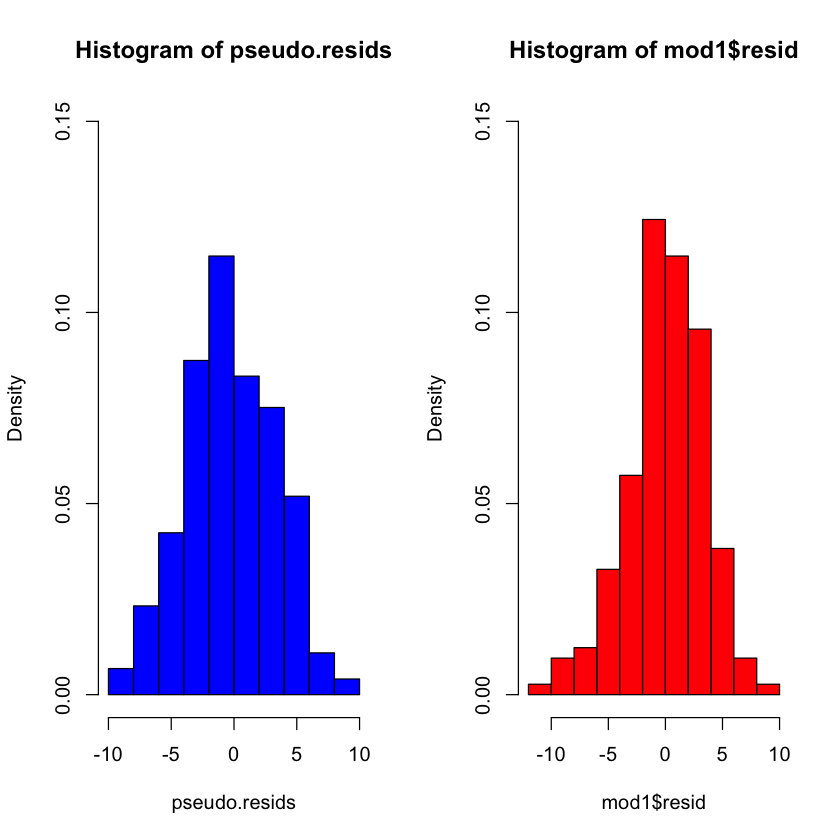

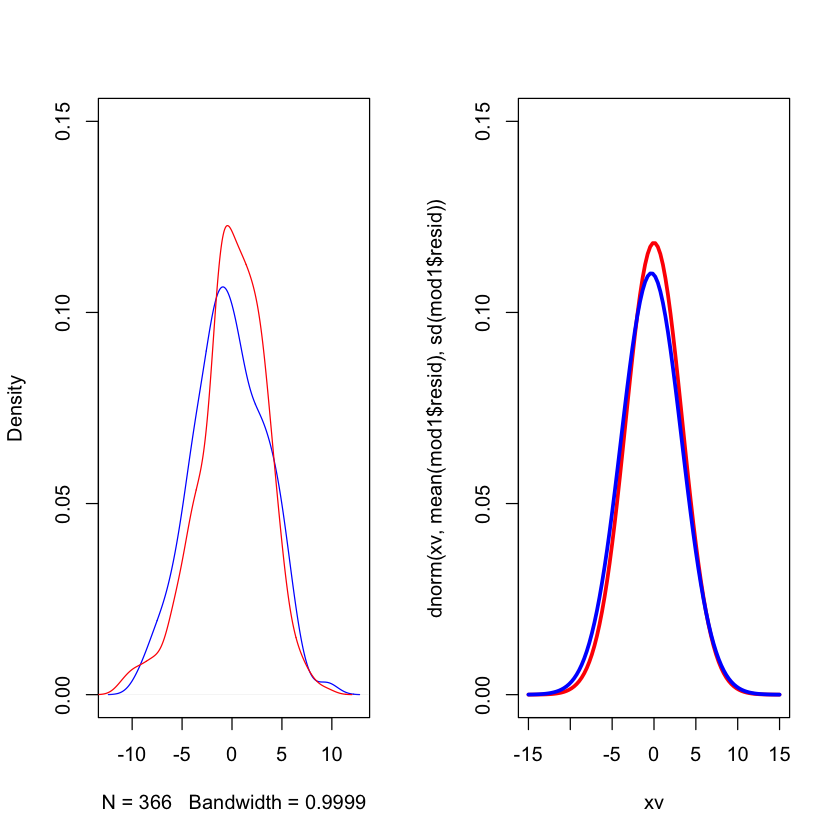

In [23]:
par(mfrow=c(1, 2))
xv <- seq(-15, 15, length=100)
hist(pseudo.resids, col=4, freq=F, ylim=c(0, 0.15))
hist(mod1$resid, col=2, freq=F, ylim=c(0, 0.15))
plot(density(pseudo.resids), col=4, ylim=c(0, 0.15), main='')
lines(density(mod1$resid), col=2)

plot(xv, 
     dnorm(xv, mean(mod1$resid), sd(mod1$resid)), 
     col=2, 
     type='l', 
     lwd=3, 
     ylim=c(0, 0.15))
lines(xv, dnorm(xv, mean(pseudo.resids), sd(pseudo.resids)), col=4, lwd=3)


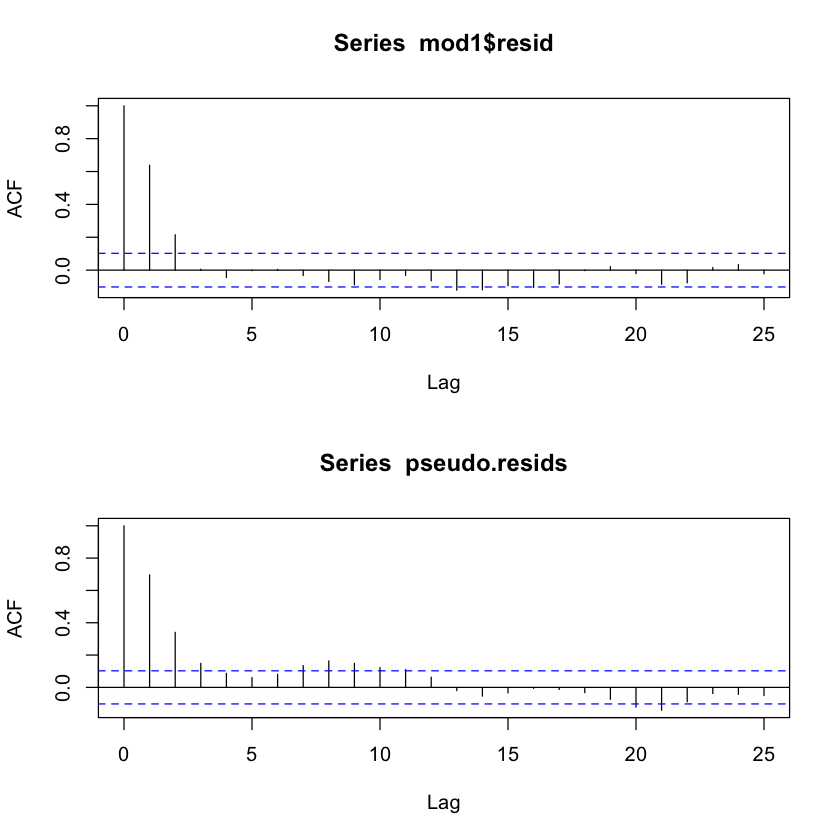

In [24]:
par(mfrow=c(2, 1))
acf(mod1$resid)
acf(pseudo.resids)

In [25]:
pseudo.data <- preds + pseudo.resids

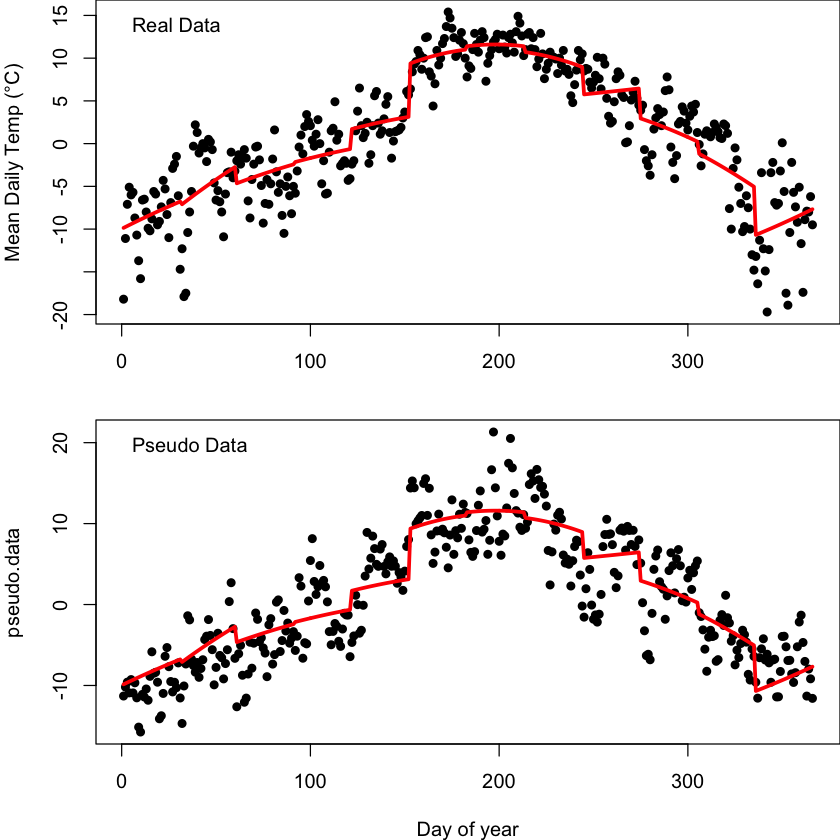

In [26]:
par(mfrow=c(2, 1))
par(mar=c(4, 4, 0, 0))
plot(daily$TAVG, 
     pch=16,  
     ylab='Mean Daily Temp (°C)',
     xlab='')
lines(preds, col=2, lwd=3)
legend('topleft', 'Real Data', bty='n')
plot(pseudo.data, xlab='Day of year', pch=16)
lines(preds, col=2, lwd=3)
legend('topleft', 'Pseudo Data', bty='n')

In [28]:
prep.data <- function(path) {
  daily <- read.csv(path)
  daily$DATE <- as.Date(daily$DATE, format='%Y-%m-%d')
  daily <- daily[complete.cases(daily), ]
  daily <- daily[order(daily$DATE), ]
  daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
  daily$YDAY <- yday(daily$DATE)
  monthly.means <- tapply(daily$TAVG, daily$MONTH, mean)
  daily$monthly.means <- monthly.means[daily$MONTH]
  monthly.precip <- tapply(daily$PRCP, daily$MONTH, sum)
  daily$monthly.precip <- monthly.precip[daily$MONTH]
  daily
}

In [136]:
predict.daily <- function(daily, statistic) {
  DAYS <- 365.25
  mod <- lm(daily[, statistic] ~ monthly.means 
             + YDAY
             #+ monthly.precip
             + monthly.precip:monthly.means
             #+ monthly.precip:YDAY
             #+ monthly.precip:I(YDAY^2)
             #+ I(YDAY^2)
             #+ YDAY:monthly.means
             #+ I(YDAY^2):monthly.means
             + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2))
             , data=daily)
  #mod <- step(mod, trace=0)
  mod
}

In [137]:
determine.best.coefs <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
  }
  coef.matrix <- matrix(0, nrow=11, ncol=length(files))
  rownames(coef.matrix) <- c(
      '(Intercept)', 'monthly.means', 'YDAY', 'monthly.precip',
      'monthly.means:monthly.precip', 'YDAY:monthly.precip',
      'monthly.precip:I(YDAY^2)', 'I(YDAY^2)', 
      'sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2))', 
      'monthly.means:YDAY', 'monthly.means:I(YDAY^2)')
  for (i in 1:length(files)) {
    file <- files[i]
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    #mod <- step(mod, trace=0)
    coeffs <- names(coef(mod))
    for (c in coeffs) {
      if (c %in% names(coef(mod))) {
        coef.matrix[c, i] <- coef(mod)[c]
      } else {
        coef.matrix[c, i] <- 0
      }
    }
  }
  coef.matrix
}

coef.matrix <- determine.best.coefs()

In [138]:
apply(coef.matrix, 1, quantile, probs=c(0.25, 0.75))
apply(coef.matrix, 1, mean)

,(Intercept),monthly.means,YDAY,monthly.precip,monthly.means:monthly.precip,YDAY:monthly.precip,monthly.precip:I(YDAY^2),I(YDAY^2),sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2)),monthly.means:YDAY,monthly.means:I(YDAY^2)
25%,0.8455053,0.5259479,-0.008037060,0,-7.314131e-04,0,0,0,1.667536,0,0
75%,3.7820070,0.8499512,-0.001377312,0,-6.489823e-06,0,0,0,5.600597,0,0


(Intercept)                           monthly.means 
                           2.4731050269                            0.6806837000 
                                   YDAY                          monthly.precip 
                          -0.0044409740                            0.0000000000 
           monthly.means:monthly.precip                     YDAY:monthly.precip 
                          -0.0004727505                            0.0000000000 
               monthly.precip:I(YDAY^2)                               I(YDAY^2) 
                           0.0000000000                            0.0000000000 
sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2))                      monthly.means:YDAY 
                           3.5365297214                            0.0000000000 
                monthly.means:I(YDAY^2) 
                           0.0000000000

Keep coeff if appearing in at least half of the models.
(I(YDAY^2) dropped)

In [139]:
find.best.ar.number <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
  }  
  best.ar.n <- c()
  for (file in files) {
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    fitted <- predict(mod)
    aics.ar <- numeric(10)
    for (ar in 1:10) {
      ar.mod <- arima(resid(mod1), order=c(ar, 0, 0))
      aics.ar[ar] <- ar.mod$aic
    }
    best.ar.n <- c(best.ar.n, which(aics.ar == min(aics.ar)))
  }
  best.ar.n
}

In [140]:
best.ar.n <- find.best.ar.number()
best.ar.n

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2

In [141]:
compile.arima.coefs <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
    files <- files[-which(grepl('hansenSawmillWY', files))]
  }  
  out <- data.frame(
      intercept=c(), ar1=c(), ar2=c(), lat=c(), lon=c(), elev=c(), 
      precip=c(), location=c())
  for (file in files) {
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    fitted <- predict(mod)
    ar2.mod <- arima(resid(mod), order=c(2, 0, 0))  
    betas <- ar2.mod$coef
    row <- data.frame(
      intercept=betas['intercept'], ar1=betas['ar1'], ar2=betas['ar2'],
      lat=daily[1, 'LATITUDE'], lon=daily[1, 'LONGITUDE'], 
      elev=daily[1, 'ELEVATION'], precip=sum(daily$PRCP), 
      location=paste(daily[1, 'NAME'], daily[1, 'YEAR'], sep=''))
    out <- rbind(out, row)
  }
  rownames(out) <- out$location
  out <- out[, -which(names(out) == 'location')]
}    
    
out <- compile.arima.coefs()

In [142]:
head(out)

,intercept,ar1,ar2,lat,lon,elev,precip
"ALPINE MEADOWS, WA US2007",-0.003507853,0.8626684,-0.3003360,47.78,-121.7,1066.8,4149.9
"ALPINE MEADOWS, WA US2008",0.008978514,0.9037962,-0.2038779,47.78,-121.7,1066.8,3722.6
"ALPINE MEADOWS, WA US2009",0.009194689,0.9197226,-0.2937408,47.78,-121.7,1066.8,4045.5
"ALPINE MEADOWS, WA US2010",-0.006898392,0.9518040,-0.3362616,47.78,-121.7,1066.8,4146.7
"ALPINE MEADOWS, WA US2011",-0.021053410,0.8138098,-0.2689931,47.78,-121.7,1066.8,4627.1
"ALPINE MEADOWS, WA US2012",-0.003181187,0.8734164,-0.3041036,47.78,-121.7,1066.8,4814.9


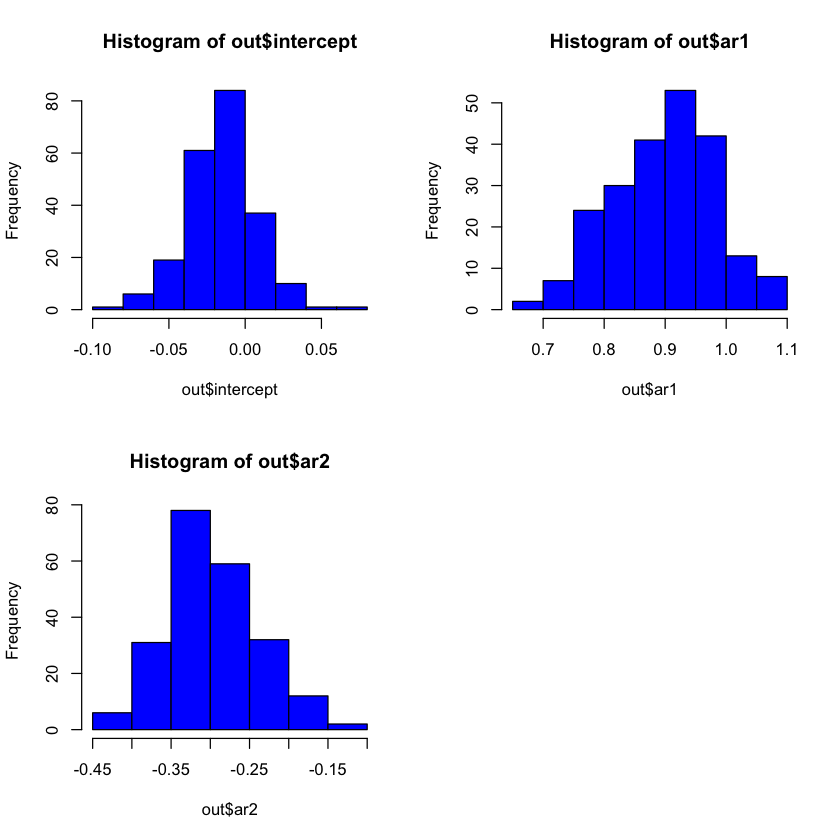

In [143]:
par(mfrow=c(2, 2))
hist(out$intercept, col=4)
hist(out$ar1, col=4)
hist(out$ar2, col=4)

In [144]:
predict.ar1.mod <- lm(ar1 ~ (lat + lon + elev + precip)^3, data=out)
predict.ar1.mod <- step(predict.ar1.mod, trace=0)
summary(predict.ar1.mod)


Call:
lm(formula = ar1 ~ lat + lon + elev + precip + lat:lon + lat:elev + 
    lat:precip + lon:elev + lon:precip + elev:precip + lat:lon:precip + 
    lon:elev:precip, data = out)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.192616 -0.047658  0.002055  0.048532  0.166432 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -9.623e+00  4.431e+00  -2.172   0.0310 *
lat              1.714e-01  6.605e-02   2.595   0.0101 *
lon             -8.518e-02  4.065e-02  -2.095   0.0373 *
elev             1.360e-03  6.595e-04   2.063   0.0404 *
precip           8.347e-03  5.472e-03   1.525   0.1287  
lat:lon          1.348e-03  6.099e-04   2.210   0.0282 *
lat:elev        -7.352e-06  4.262e-06  -1.725   0.0860 .
lat:precip      -1.277e-04  8.609e-05  -1.483   0.1395  
lon:elev         9.119e-06  6.710e-06   1.359   0.1756  
lon:precip       6.957e-05  4.561e-05   1.525   0.1287  
elev:precip     -1.292e-06  7.343e-07  -1.759   0.0800 .
lat:l

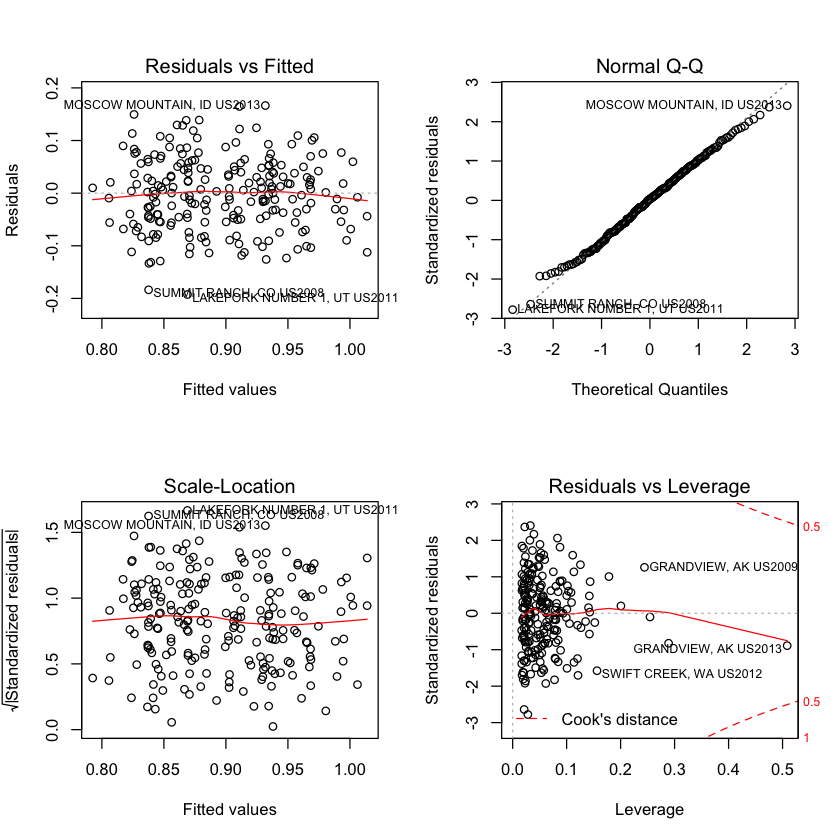

In [145]:
par(mfrow=c(2, 2))
plot(predict.ar1.mod)

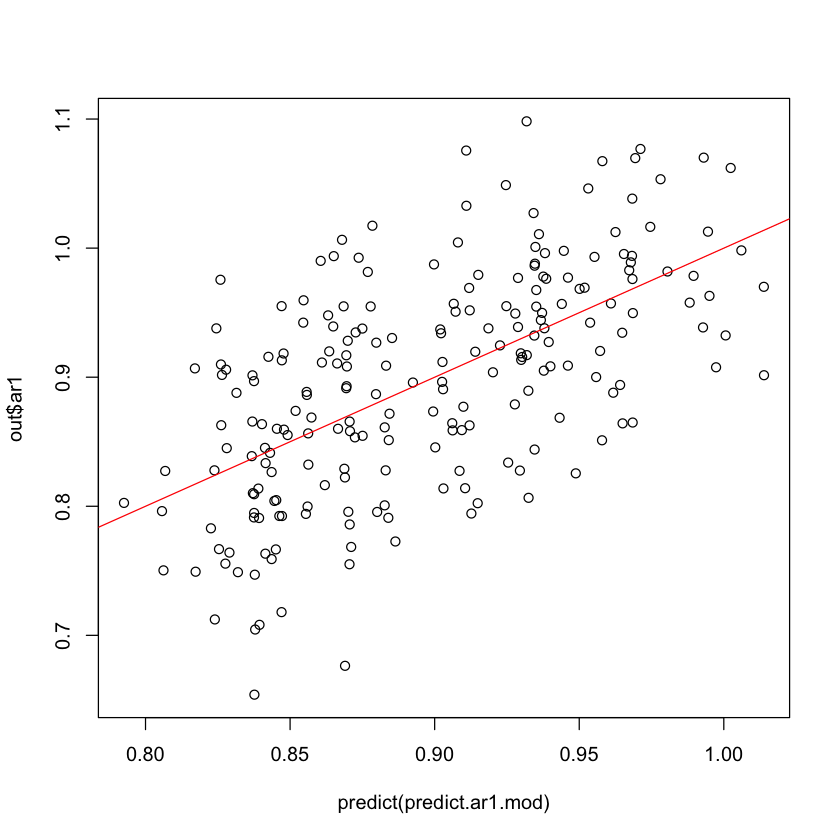

In [146]:
plot(out$ar1 ~ predict(predict.ar1.mod))
abline(0, 1, col=2)

In [147]:
out$ar1 <- predict(predict.ar1.mod)

In [148]:
predict.ar2.mod <- lm(
    ar2 ~ (lat + lon + elev + precip + ar1)^4, 
    data=out)
predict.ar2.mod <- step(predict.ar2.mod, trace=0)
summary(predict.ar2.mod)


Call:
lm(formula = ar2 ~ lat + lon + elev + precip + ar1 + lat:lon + 
    lat:elev + lat:ar1 + lon:elev + lon:precip + lon:ar1 + elev:precip + 
    elev:ar1 + precip:ar1 + lat:elev:ar1 + lon:elev:ar1 + lon:precip:ar1, 
    data = out)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118698 -0.030304 -0.002736  0.031369  0.137067 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.724e+01  7.149e+00  -3.810 0.000184 ***
lat            -6.050e-01  2.234e-01  -2.709 0.007335 ** 
lon            -3.857e-01  1.118e-01  -3.451 0.000680 ***
elev            9.727e-03  2.859e-03   3.402 0.000806 ***
precip          1.113e-02  6.186e-03   1.800 0.073359 .  
ar1             3.721e+01  9.183e+00   4.052 7.24e-05 ***
lat:lon        -1.219e-03  6.824e-04  -1.786 0.075579 .  
lat:elev        1.521e-04  7.911e-05   1.922 0.055974 .  
lat:ar1         4.713e-01  2.051e-01   2.298 0.022582 *  
lon:elev        1.285e-04  4.673e-05   2.750 0.006494 *

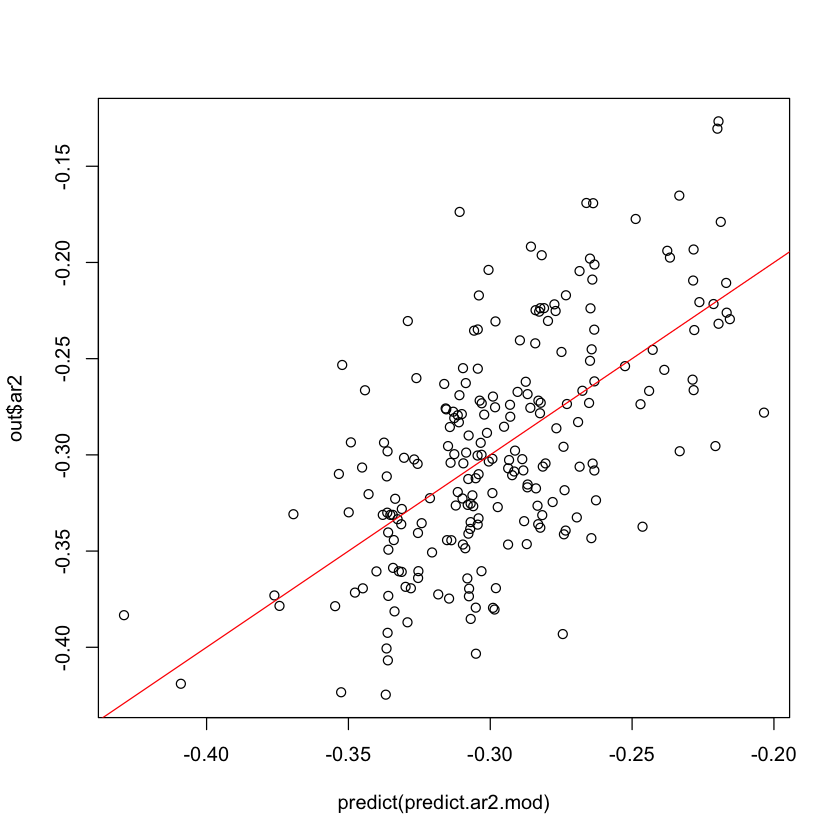

In [149]:
plot(out$ar2 ~ predict(predict.ar2.mod))
abline(0, 1, col=2)

# Predict from Monthly

In [150]:
prep.data <- function(path) {
  data <- read.csv(path)
  data$DATE <- as.Date(data$DATE, format='%Y-%m-%d')
  data <- daily[order(data$DATE), ]
  data$MONTH <- as.numeric(format(data$DATE, '%m'))
  data$YDAY <- yday(data$DATE)
  monthly.means <- tapply(data$TAVG, data$MONTH, mean)
  data$monthly.means <- monthly.means[data$MONTH]
  data
}

In [151]:
data <- prep.data(paste(DATA_DIR, files[10], sep=''))
ar.data <- data.frame(lat=data[1, 'LATITUDE'], 
                      lon=data[1, 'LONGITUDE'], 
                      elev=data[1, 'ELEVATION'], 
                      precip=sum(data$PRCP))
ar.data$ar1 <- predict(predict.ar1.mod, newdata=ar.data)
ar.data$ar2 <- predict(predict.ar2.mod, newdata=ar.data)
ar.data

lat,lon,elev,precip,ar1,ar2
40.6,-110.43,3174.5,732.3,0.8694121,-0.2643615


In [152]:
predict.daily.mean <- function(daily, statistic) {
  DAYS <- 365.25
  mod <- lm(daily[, statistic] ~ monthly.means 
              + YDAY
              + monthly.precip:monthly.means
              + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2)),
            data=daily)
  mod
}